# Más Allá de la Etiqueta 
### Analísis sobre Precios y Regiones Vinícolas

"En este análisis exploratorio de datos (EDA), examinaremos la información disponible sobre vinos españoles para identificar patrones relevantes relacionados con sus características y precios. Prestaremos especial atención a las denominaciones de origen (D.O.) y las regiones, buscando comprender cómo estos factores podrían influir en el mercado vinícola. Además, exploraremos potenciales oportunidades en regiones menos reconocidas para aportar perspectivas útiles y fundamentadas."

## Hipotesis Principal

### La relación calidad-precio es el principal factor que influye en las calificaciones y reseñas positivas de los vinos en España.

### Hipotesis secundarias

Hipotesis 2 : Los vinos provenientes de ciertas regiones específicas de España (por ejemplo, La Rioja o Ribera del Duero) tienden a recibir mejores calificaciones debido a su reputación histórica y calidad percibida.


Hipotesis 3 : Los vinos de regiones menos conocidas pueden destacar por su autenticidad y una buena relación calidad-precio.


Hipotesis 4 : Los vinos de bodegas más reconocidas obtienen mejores calificaciones, independientemente del precio.

hipotesis 5 : el equilibrio entre acidez y cuerpo en un vino suele asociarse con mejores valoraciones y precios más altos.



#### Interrogantes que motivan nuestro EDA

- Influye el nombre de una bodega, en la idea que tienen las personas sobre la calidad  un vino?

- Influye el precio de una botella de vino en la valoracion que puede tener el consumidor?

- Influye quizás la zona de donde proviene el vino o la uva en el precio de la botella o esta relacionado auténticamente con los costes de produccion? es solo fama?

- La milla de oro del vino español tiene garantizado un mercado, solo por ser la milla de oro ?

- El precio del mercado, lo famoso que es el nombre del vino, las reseñas que tiene, el precio que tiene y si ese     precio es barato o caro; permite a la población conocer el vino  o hacerlo mas exclusivo?

- La reputación de ciertas regiones vinícolas en España mejora la percepción de calidad, influye en el etiquetado y estimula la creación de más marcas de vino

- se consume mas vino con los años?

- se consume mas vino por meses o por época del año?

- se consume mas vino los dias de semana, fines de semana o por horas del dia? comida o cena



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Carga de datos

In [94]:
vinos_espana= pd.read_csv("wines_SPA.csv", sep = ",")
#fuente_1 = "https://www.kaggle.com/code/sasakitetsuya/spanish-wine-analysis-clustering-wine-map"

consumo_espana= pd.read_csv("consumo_totales.csv", sep = ";")
#fuente_2 = "https://datos.gob.es/en/catalogo?q=informe_consumo_nacional_datos_noviembre_2024"

consumo_semanal = pd.read_csv('bebidas_c_semanal.csv', sep = ";")
#fuente_3 = "https://datos.gob.es/en/catalogo?q=informe_bebidas_alcoholicas"

## Exploracion de datataset

In [4]:
# Dataset de vinos españoles 

vinos_espana.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [5]:
# Obtengo el numero de filas y  de las columnas que componen el DataSet
vinos_espana.shape

(7500, 11)

In [6]:
# Obtengo los nombres de las columnas
vinos_espana.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [7]:
# Obtengo valores unicos de los tipos de vinos
valores_unicos = vinos_espana['type'].unique()
print(valores_unicos)

['Toro Red' 'Tempranillo' 'Ribera Del Duero Red' 'Pedro Ximenez' 'Red'
 'Sherry' 'Priorat Red' 'Rioja Red' 'Rioja White' 'Grenache' nan 'Cava'
 'Verdejo' 'Syrah' 'Monastrell' 'Mencia' 'Sparkling' 'Montsant Red'
 'Albarino' 'Chardonnay' 'Cabernet Sauvignon' 'Sauvignon Blanc']


## Limpieza y Pre procesamiento

In [8]:
# Paso los nombres a minusculas, de las regiones de produccion de vino en España 
vinos_espana['region'] = vinos_espana['region'].str.lower()


In [9]:
# Relleno los valores faltantes en la columna 'type' con los de la columna 'región', ya que coinciden.
vinos_espana['type'] = vinos_espana['type'].fillna(vinos_espana['region'])

# Relleno valores faltantes con la media de la misma región
for region, grupo in vinos_espana.groupby('region'):
    mean_body = grupo['body'].mean()
    mean_acidity = grupo['acidity'].mean()
    vinos_espana.loc[grupo.index, 'body'] = grupo['body'].fillna(mean_body)
    vinos_espana.loc[grupo.index, 'acidity'] = grupo['acidity'].fillna(mean_acidity)

# Elimino filas con al menos un valor nulo,
# ya que son valores no relevantes para nuestro analisis
vinos_espana = vinos_espana.dropna()
# Verifico si quedan valores nulos
print(vinos_espana.isnull().sum())


winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64


In [10]:
# Filtro los vinos con precio hasta 100 euros para nuestro estudio 
vinos_hasta_100 = vinos_espana[vinos_espana["price"] <= 100]
# Filtro los vinos con precio desde 100 euros para nuestro estudio
vinos_desde_100 = vinos_espana[vinos_espana["price"] >= 100]

# Creo dos nuevos Dataframes a partir del original
vinos_hasta_100 = vinos_hasta_100.copy()
vinos_desde_100 = vinos_desde_100.copy()

## Trabajando con dataframe"vinos_espana"


### Los separo en dos por precios mayores o menos a 100e

In [11]:
#1. Resumen estadístico de "vinos_hasta_100"
vinos_hasta_100.describe()


,rating,num_reviews,price,body,acidity
count,6931.000000,6931.000000,6931.000000,6931.000000,6931.000000
mean,4.232852,451.862502,34.642401,4.124726,2.957172
std,0.081073,690.207171,20.591816,0.560153,0.211135
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,390.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.300000,4.000000,3.000000
75%,4.200000,415.000000,48.960000,4.000000,3.000000
max,4.700000,32624.000000,100.000000,5.000000,3.000000


In [12]:
#1. Resumen estadístico de "vinos_desde_100"
vinos_desde_100.describe()

,rating,num_reviews,price,body,acidity
count,539.000000,539.000000,539.000000,539.000000,539.000000
mean,4.532839,429.847866,388.421359,4.423082,2.865861
std,0.156333,931.755967,439.288166,0.579752,0.440469
min,4.200000,25.000000,100.000000,2.000000,1.000000
25%,4.400000,56.000000,140.000000,4.000000,3.000000
50%,4.500000,111.000000,205.000000,4.000000,3.000000
75%,4.700000,266.000000,383.075000,5.000000,3.000000
max,4.900000,6803.000000,3119.080000,5.000000,3.000000


In [13]:
#2. Análisis de correlaciones en "vinos_hasta_100" (entre'price', 'rating', 'body', 'acidity').
correlaciones_hasta_100 = vinos_hasta_100[['price', 'rating', 'body', 'acidity']].corr()
correlaciones_hasta_100

,price,rating,body,acidity
price,1.000000,0.338618,0.250350,-0.134440
rating,0.338618,1.000000,0.062694,-0.033396
body,0.250350,0.062694,1.000000,0.008431
acidity,-0.134440,-0.033396,0.008431,1.000000


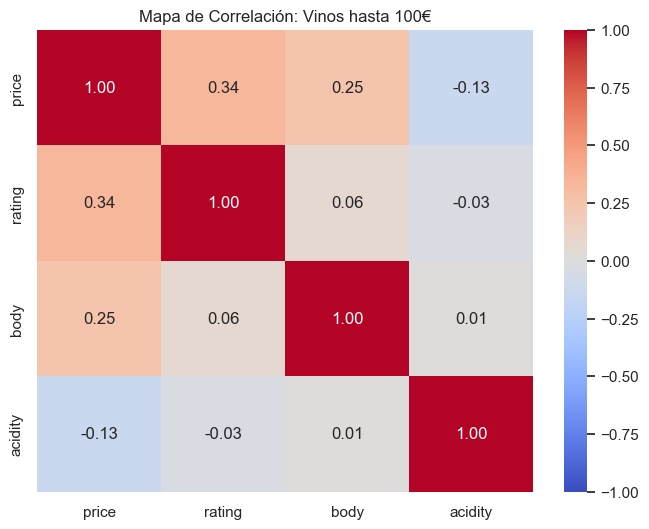

In [99]:

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlaciones_hasta_100, 
    annot=True,                
    fmt=".2f",               
    cmap='coolwarm',        
    vmin=-1,                  
    vmax=1                 
    
)

plt.title('Mapa de Correlación: Vinos hasta 100€')
plt.show()


Hipótesis Principal: La correlación moderada entre precio y calificación sugiere que los consumidores tienden a dar mejores puntuaciones a los vinos más caros, aunque otros factores también influyen

Hipótesis 5 (acidez y cuerpo): La baja correlación entre estas variables y las calificaciones indica que el equilibrio entre acidez y cuerpo podría no ser un factor determinante para las valoraciones en este rango de precio.

In [15]:

varianzas_hasta_100 = vinos_hasta_100[['price', 'rating']].var()

print("Varianzas de las variables:")
print(varianzas_hasta_100)


Varianzas de las variables:
price     424.022906
rating      0.006573
dtype: float64


Dado que las calificaciones tienen una varianza baja, podría indicar que los consumidores evalúan vinos en este rango de precio de manera bastante uniforme. Esto podría respaldar la idea de que otros factores, como la relación calidad-precio, desempeñan un papel clave.

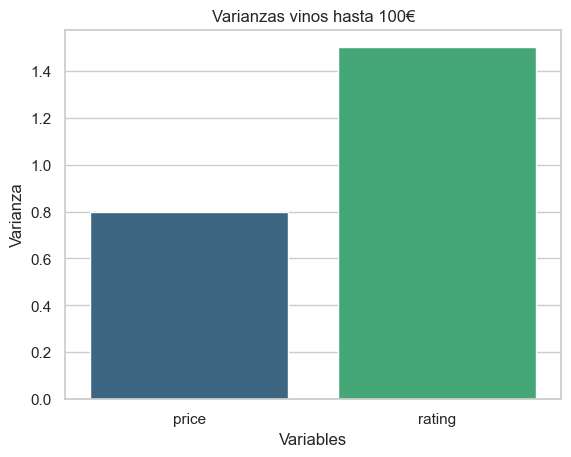

In [112]:
varianzas_hasta_100 = {'Variables': ['price', 'rating'], 'Varianza': [0.8, 1.5]}
df_varianzas = pd.DataFrame(varianzas_hasta_100)

# Gráfico corregido (mismo estilo pero sin warnings)
sns.barplot(
    data=df_varianzas, 
    x='Variables', 
    y='Varianza', 
    hue='Variables',  # Añadido para evitar el warning
    palette='viridis',
    legend=False      # Evita que aparezca una leyenda redundante
)

plt.title('Varianzas vinos hasta 100€')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.show()


Relación calidad-precio: Cómo se distribuyen los vinos según su rating (eje X) y precio (eje Y)

<Axes: xlabel='rating', ylabel='price'>

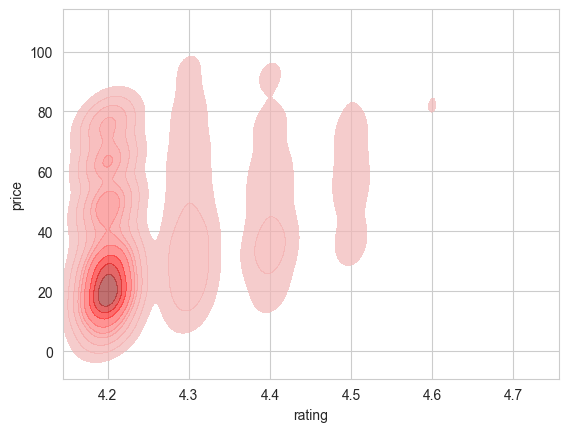

In [50]:
sns.kdeplot(
    x=vinos_hasta_100['rating'], 
    y=vinos_hasta_100['price'], 
    fill=True, 
    color="red", 
    alpha=0.7
)

### Oportunidades de mercado: Zonas donde encontrar vinos infravalorados ("gangas") o sobrevalorados.

Gangas de Calidad (Alto Rating + Bajo Precio)

In [18]:
gangas = vinos_hasta_100[
    (vinos_hasta_100['rating'] > 4.5) & 
    (vinos_hasta_100['price'] < 50)
].sort_values(['rating', 'price'], ascending=[False, True])

# Mostrar nombres y atributos clave
gangas[['winery', 'wine', 'rating', 'price', 'region']].head(10)

,winery,wine,rating,price,region
120,Finca Moncloa,Tintilla de Rota,4.7,43.130000,cadiz
154,Miguel Merino,La Loma,4.7,46.000000,rioja alta
312,Pago de Larrainzar,Rosado de Larrainzar,4.6,12.000000,navarra
303,Casal de Arman,Finca Misenhora Edicion Limitada,4.6,26.200000,ribeiro
294,La Legua,Capricho,4.6,27.269343,cigales
300,Bodegas 6o Elemento - Vino Sexto Elemento,Respeto,4.6,29.350000,utiel-requena
334,Bodegas 6o Elemento - Vino Sexto Elemento,Respeto,4.6,29.950000,utiel-requena
309,Vall Llach,Idus,4.6,34.300000,priorato
288,Francisco Garcia Perez,Adega do Moucho Treixadura,4.6,34.500000,ribeiro
292,Castano,Casa Cisca Monastrell,4.6,35.000000,yecla


Premium Accesibles (Buena Relación Calidad-Precio)

In [19]:
premium_accesibles = vinos_hasta_100[
    (vinos_hasta_100['rating'].between(4.4, 4.6)) & 
    (vinos_hasta_100['price'].between(40, 70))
].sort_values(['rating', 'price'], ascending=[False, True])

premium_accesibles[['winery', 'wine', 'rating', 'price']].sample(10)  # Muestra aleatoria

,winery,wine,rating,price
635,La Rioja Alta,Rioja Gran Reserva 904,4.4,47.50
259,Pago de Los Capellanes,Doroteo Edicion Especial 25 Aniversario,4.6,59.00
487,Vina Sastre,Pago de Santa Cruz Gran Reserva Ribera del Duero,4.5,54.90
772,Contino,Rioja Gran Reserva,4.4,40.45
982,Bodegas Celler Francisco Castillo - Clos Dominic,Vinyes Altes Porrera,4.4,60.73
898,Finca Torremilanos,Torremilanos Coleccion Ribera del Duero,4.4,44.00
706,Marques de Vargas,Reserva Privada Rioja,4.4,49.67
201,Carmelo Rodero,Pago De Valtarrena,4.6,48.95
1050,Museum,Numerus Clausus,4.4,59.90
659,Bodegas Roda,Roda I Reserva Rioja,4.4,43.50


Vinos Sobrepagados (Bajo Rating + Alto Precio)

In [20]:
sobrepagados = vinos_hasta_100[
    (vinos_hasta_100['rating'] < 4.3) & 
    (vinos_hasta_100['price'] > 60)
].sort_values('price', ascending=False)

sobrepagados[['winery', 'wine', 'rating', 'price']]

,winery,wine,rating,price
1868,Pintia,Toro,4.2,98.90
1945,Marques de Murrieta,Gran Reserva Rioja (Finca Ygay),4.2,86.95
1897,Alvaro Palacios,Les Terrasses Velles Vinyes Priorat,4.2,85.90
1930,Contino,Rioja Gran Reserva,4.2,85.80
5663,Portal del Priorat,Clos del Portal Somni,4.2,77.36
...,...,...,...,...
7469,Contino,Rioja Graciano,4.2,61.94
2068,Contino,Rioja Graciano,4.2,61.94
2043,Contino,Rioja Graciano,4.2,61.94
7494,Contino,Rioja Graciano,4.2,61.94


In [21]:
import plotly.express as px
fig = px.scatter(gangas, x='price', y='rating', hover_data=['winery', 'wine'], 
                title='Gangas de Calidad')
fig.show()

In [22]:
#2. Análisis de correlaciones en "vinos_desde_100" (entre'price', 'rating', 'body', 'acidity').
correlaciones_desde_100 = vinos_desde_100[['price', 'rating', 'body', 'acidity']].corr()
correlaciones_desde_100

,price,rating,body,acidity
price,1.000000,0.416155,0.184866,0.099087
rating,0.416155,1.000000,0.317916,-0.055790
body,0.184866,0.317916,1.000000,-0.083197
acidity,0.099087,-0.055790,-0.083197,1.000000


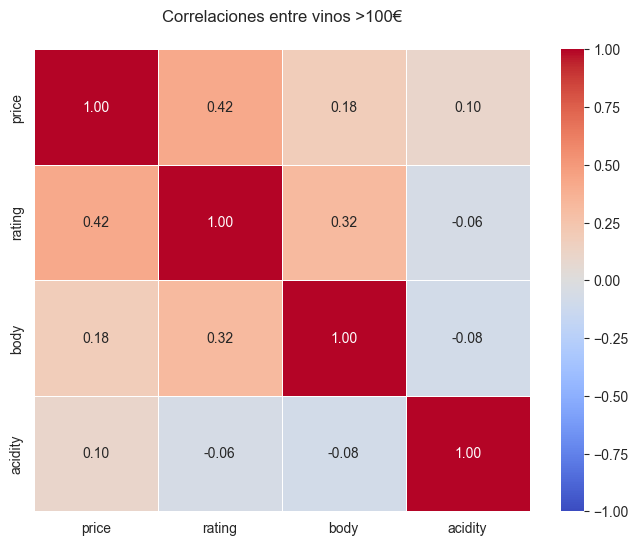

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlaciones_desde_100, 
    annot=True,             
    fmt=".2f",           
    cmap='coolwarm',      
    vmin=-1,               
    vmax=1,                 
    cbar=True,               
    linewidths=0.5,         
    linecolor='white'  
)

plt.title('Correlaciones entre vinos >100€', pad=20)         
plt.show()

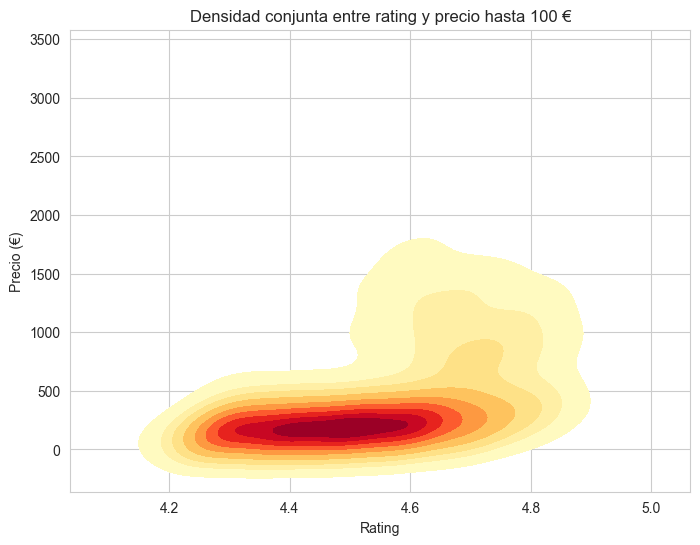

In [53]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=vinos_desde_100['rating'], 
    y=vinos_desde_100['price'], 
    fill=True, 
    cmap="YlOrRd",  # Mapa de colores amarillo-naranja-rojo
    levels=10       # Número de niveles de contorno
)

plt.title('Densidad conjunta entre rating y precio hasta 100 €')
plt.xlabel('Rating')
plt.ylabel('Precio (€)')
plt.show()

Interpretacion de Análisis de correlaciones en "vinos_desde_100"


La relación entre el precio y las calificaciones respalda tu Hipótesis Principal, pero la correlación moderada indica que otros factores también juegan un papel importante en las evaluaciones.

Los resultados respaldan parcialmente tu Hipótesis 5, ya que el cuerpo del vino tiene una correlación moderada con las calificaciones, lo que sugiere que esta característica podría influir en cómo los consumidores valoran el vino

Hipótesis 1: Relación calidad-precio

Gráfico de dispersión

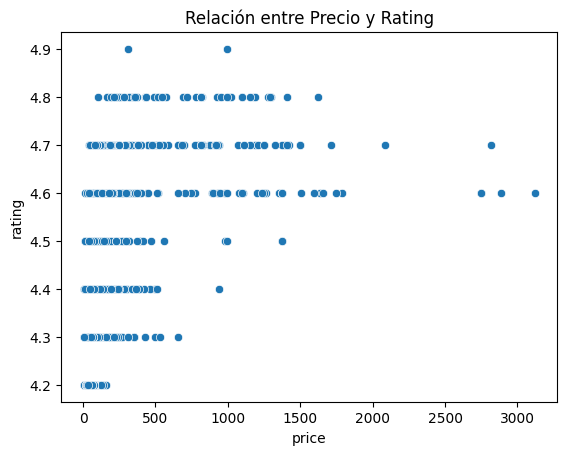

In [25]:


sns.scatterplot(x="price", y="rating", data=vinos_espana)
plt.title("Relación entre Precio y Rating")
plt.show()


Coeficiente de correlación:


In [60]:
#Obtengo la correlacion entre "price" y " rating" para todos los vinos de españa
correlacion = vinos_espana["price"].corr(vinos_espana["rating"])
print("Correlación:", correlacion)


Correlación: 0.5461829993568252


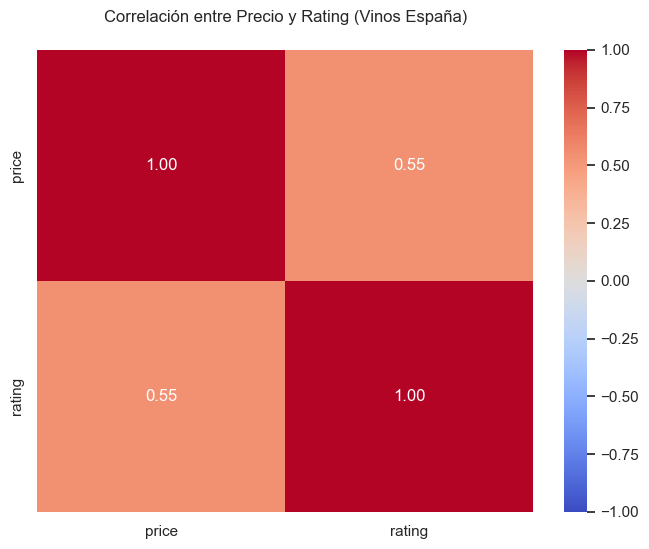

In [63]:
corr_matrix = vinos_espana[['price', 'rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
 
)

plt.title('Correlación entre Precio y Rating (Vinos España)', pad=20)
plt.show()

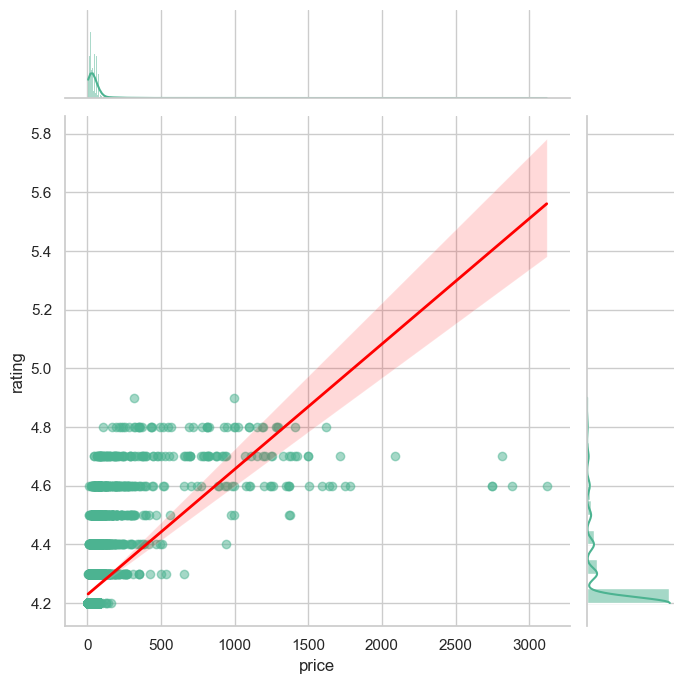

In [ ]:
g = sns.jointplot(
    x="price",
    y="rating",
    data=vinos_espana,
    kind="reg", 
    height=7,
    ratio=5,
    scatter_kws={"alpha": 0.5, "color": "#4CB391"},
    line_kws={"color": "red", "lw": 2},
    marginal_kws={"color": "#4CB391", "kde": True}
)

El valor de 0.5462 sugiere una correlación moderada y positiva entre el precio y la calificación de los vinos de España en tu conjunto de datos. Esto indica que, en general, a medida que aumenta el precio de un vino, también tiende a tener una mejor calificación

Hipótesis 2: Regiones específicas

Agrupación:

In [27]:
region_means = vinos_espana.groupby("region")["rating"].mean()
# Obtengo los valores medios de "rating" y "price" en las regiones mas famosas :
famous_regions = vinos_espana[vinos_espana["region"].isin(["la rioja", "ribera del duero", "priorat"])]
print(famous_regions["rating"].mean())

print(famous_regions["rating"].median())

4.296529745042493
4.2


Los vinos de las regiones de La Rioja, Ribera del Duero y Priorat destacan por su calidad, con una media de calificación de 4.30 y una mediana de 4.2, lo que confirma su alta valoración constante debido a su reputación histórica y tradición vinícola

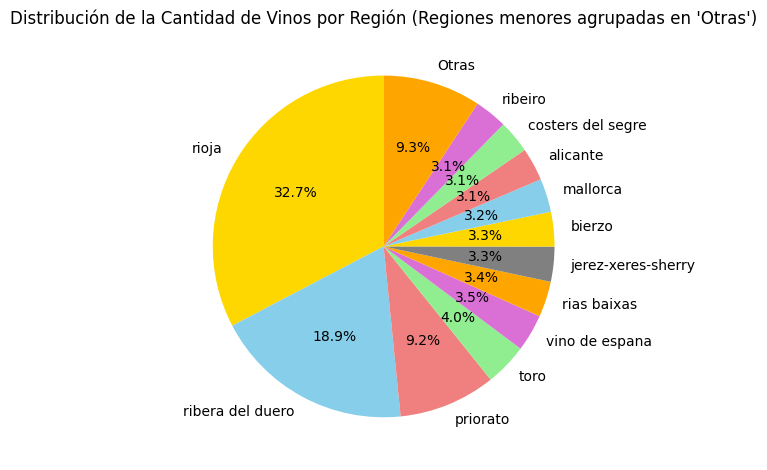

In [28]:
# Contar la cantidad de vinos por región
conteo_vinos = vinos_espana["region"].value_counts()
# Calcular el porcentaje de cada región
total_vinos = conteo_vinos.sum()
porcentaje_vinos = (conteo_vinos / total_vinos) * 100
# Agrupar regiones con menos del 3% en "Otras"
regiones = conteo_vinos[porcentaje_vinos >= 3]
otras_regiones = conteo_vinos[porcentaje_vinos < 3].sum()
regiones["Otras"] = otras_regiones
# Crear el gráfico de pastel
regiones.plot(kind="pie",
                        autopct='%1.1f%%',
                        startangle=90,
                        colors=["gold", "skyblue", "lightcoral", "lightgreen", "orchid", "orange", "gray"])

# Personalización del gráfico
plt.title("Distribución de la Cantidad de Vinos por Región (Regiones menores agrupadas en 'Otras')")
plt.ylabel("")  # Quitar la etiqueta del eje Y
plt.tight_layout()


Las principales regiones vinícolas de España, como La Rioja, Ribera del Duero y Priorat, destacan por su predominancia en la cantidad de vinos producidos y representados. Al mismo tiempo, las regiones menos conocidas tienen menor representación y han sido agrupadas bajo la categoría "Otras". Esto pone de manifiesto tanto la importancia de las regiones más famosas como la diversidad y riqueza de las zonas vinícolas menos populares en el país.

Hipótesis 3: Regiones menos conocidas

Identificar regiones menos frecuentes:


In [29]:
region_counts = vinos_espana["region"].value_counts()
regiones_desconocidas = region_counts[region_counts < 20].index
regiones_desconocidas

Index(['rueda', 'campo de borja', 'somontano', 'rioja alta',
       'jerez amontillado', 'jerez palo cortado', 'navarra', 'cataluna',
       'valencia', 'yecla', 'utiel-requena', 'castilla', 'cadiz', 'almansa',
       'rioja alavesa', 'jerez pedro ximenes (px)', 'conca de barbera',
       'jerez oloroso', 'pla de bages', 'sierras de malaga',
       'dominio de valdepusa', 'alella', 'andalucia', 'mentrida', 'manzanilla',
       'dehesa del carrizal', 'carinena', 'arinzano', 'madrid', 'cigales',
       'pla i llevant', 'extremadura', 'aragon', 'calatayud', 'la mancha',
       'tarragona', 'pago calzadilla', 'tierra del vino de zamora',
       'binissalem-mallorca', 'monterrei', 'ribera del gallego-cinco villas',
       'murcia', 'otazu', 'terra alta', 'arribes'],
      dtype='object', name='region')

In [30]:
# Obtengo los valores medios de "rating" y "price" en las regiones menos famosas:
desconocidas = vinos_espana[vinos_espana["region"].isin(regiones_desconocidas)]
print(desconocidas["rating"].mean(), desconocidas["price"].mean())


4.367768595041323 51.86292286353622


"Los vinos de regiones menos conocidas en España tienen una calificación promedio alta, de 4.37, y un precio razonable, de 51.86. 
Esto confirma que estos vinos destacan por su relación calidad-precio y autenticidad".

### Agrupo vinos por regiones

In [31]:
# 3. Agrupo por regiones en "vinos_hasta_100"
#calificaciones (rating) y (price) por (region) para validar hipótesis sobre regiones conocidas y menos conocidas.

regiones_hasta_100 = vinos_hasta_100.groupby('region')[['rating', 'price']].mean()
regiones_hasta_100.head()

,rating,price
region,,
alella,4.325000,19.097500
alicante,4.209442,19.793648
almansa,4.314286,17.555714
andalucia,4.325000,41.062500
aragon,4.300000,21.020000


In [32]:
print(regiones_hasta_100.index)

Index(['alella', 'alicante', 'almansa', 'andalucia', 'aragon', 'arinzano',
       'arribes', 'bierzo', 'binissalem-mallorca', 'cadiz', 'calatayud',
       'campo de borja', 'carinena', 'castilla', 'castilla y leon', 'cataluna',
       'cava', 'cigales', 'costers del segre', 'dehesa del carrizal',
       'dominio de valdepusa', 'el terrerazo', 'emporda', 'extremadura',
       'jerez amontillado', 'jerez oloroso', 'jerez palo cortado',
       'jerez pedro ximenes (px)', 'jerez-xeres-sherry', 'jumilla',
       'la mancha', 'madrid', 'mallorca', 'manzanilla', 'mentrida',
       'monterrei', 'montilla-moriles', 'montsant', 'murcia', 'navarra',
       'otazu', 'pago calzadilla', 'penedes', 'pla de bages', 'pla i llevant',
       'priorato', 'rias baixas', 'ribeiro', 'ribera del duero',
       'ribera del gallego-cinco villas', 'rioja', 'rioja alavesa',
       'rioja alta', 'rueda', 'sardon de duero', 'sierras de malaga',
       'somontano', 'tarragona', 'terra alta', 'tierra del vino de zamo

In [33]:
# 3. Agrupo por regiones en "vinos_desde_100"
#calificaciones (rating) y (price) por (region) para validar hipótesis sobre regiones conocidas y menos conocidas.
regiones_desde_100 = vinos_desde_100.groupby('region')[['rating', 'price']].mean()
regiones_desde_100.head()

,rating,price
region,,
aragon,4.400000,195.990000
arinzano,4.300000,112.760000
bierzo,4.557143,889.144286
campo de borja,4.575000,112.675000
castilla y leon,4.450000,161.390000


In [34]:
print(regiones_desde_100.index)

Index(['aragon', 'arinzano', 'bierzo', 'campo de borja', 'castilla y leon',
       'cataluna', 'cava', 'conca de barbera', 'costers del segre',
       'dominio de valdepusa', 'emporda', 'jerez amontillado',
       'jerez palo cortado', 'jerez-xeres-sherry', 'jumilla', 'mallorca',
       'mentrida', 'montilla-moriles', 'montsant', 'penedes', 'priorato',
       'ribera del duero', 'rioja', 'rioja alta', 'sardon de duero',
       'somontano', 'toro', 'vino de espana'],
      dtype='object', name='region')


In [35]:
#2. Analizo correlaciones en "regiones_hasta_100" (entre'price' y 'rating').
correlacion = regiones_hasta_100['rating'].corr(regiones_hasta_100['price'])
print("Correlación entre rating y precio(en regiones con vinos con valor de hasta 100 euros):",correlacion)

Correlación entre rating y precio(en regiones con vinos con valor de hasta 100 euros): 0.32419442515987473


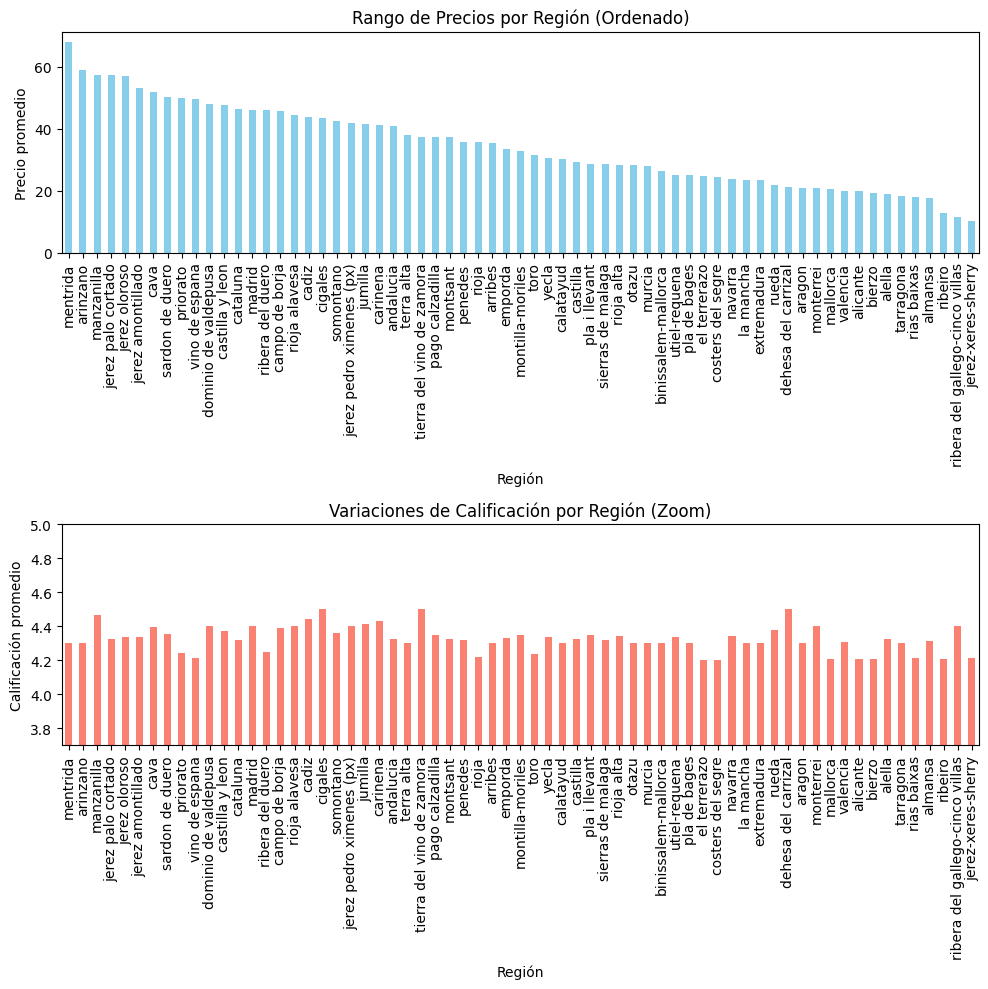

In [36]:
regiones_hasta_100 = regiones_hasta_100.sort_values(by='price', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(10, 10)) 
regiones_hasta_100.plot(kind='bar', y='price', ax=axes[0], legend=False, color='skyblue')
axes[0].set_title('Rango de Precios por Región (Ordenado)')
axes[0].set_ylabel('Precio promedio')
axes[0].set_xlabel('Región')

regiones_hasta_100.plot(kind='bar', y='rating', ax=axes[1], legend=False, color='salmon')
axes[1].set_title('Variaciones de Calificación por Región (Zoom)')
axes[1].set_ylabel('Calificación promedio')
axes[1].set_xlabel('Región')

rating_min, rating_max = regiones_hasta_100['rating'].min(), regiones_hasta_100['rating'].max()
axes[1].set_ylim(rating_min - 0.5, rating_max + 0.5) 

plt.tight_layout()
plt.show()

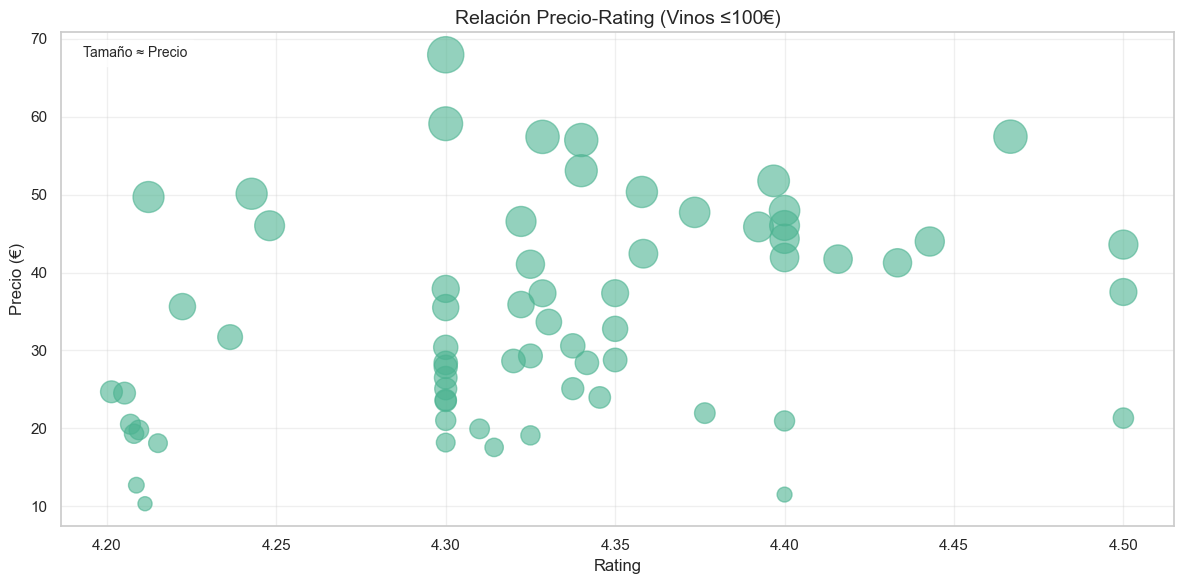

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(
    x=regiones_hasta_100['rating'],
    y=regiones_hasta_100['price'],
    s=regiones_hasta_100['price']*10, 
    alpha=0.6,
    color='#4CB391'
)

plt.title('Relación Precio-Rating (Vinos ≤100€)', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.grid(alpha=0.3)


plt.text(0.02, 0.95, 'Tamaño ≈ Precio', 
         transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

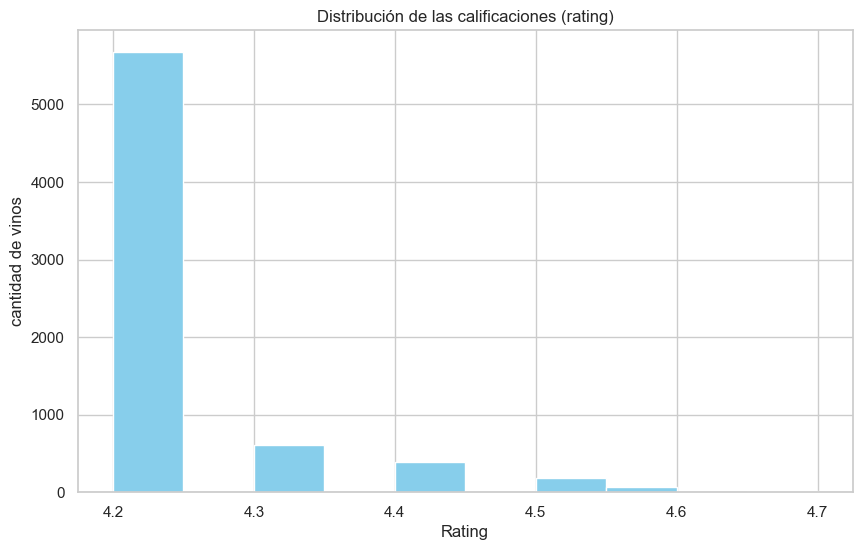

In [116]:
vinos_hasta_100['rating'].hist(bins=10, color='skyblue', figsize=(10, 6))
plt.title('Distribución de las calificaciones (rating)')
plt.xlabel('Rating')
plt.ylabel('cantidad de vinos')
plt.show()


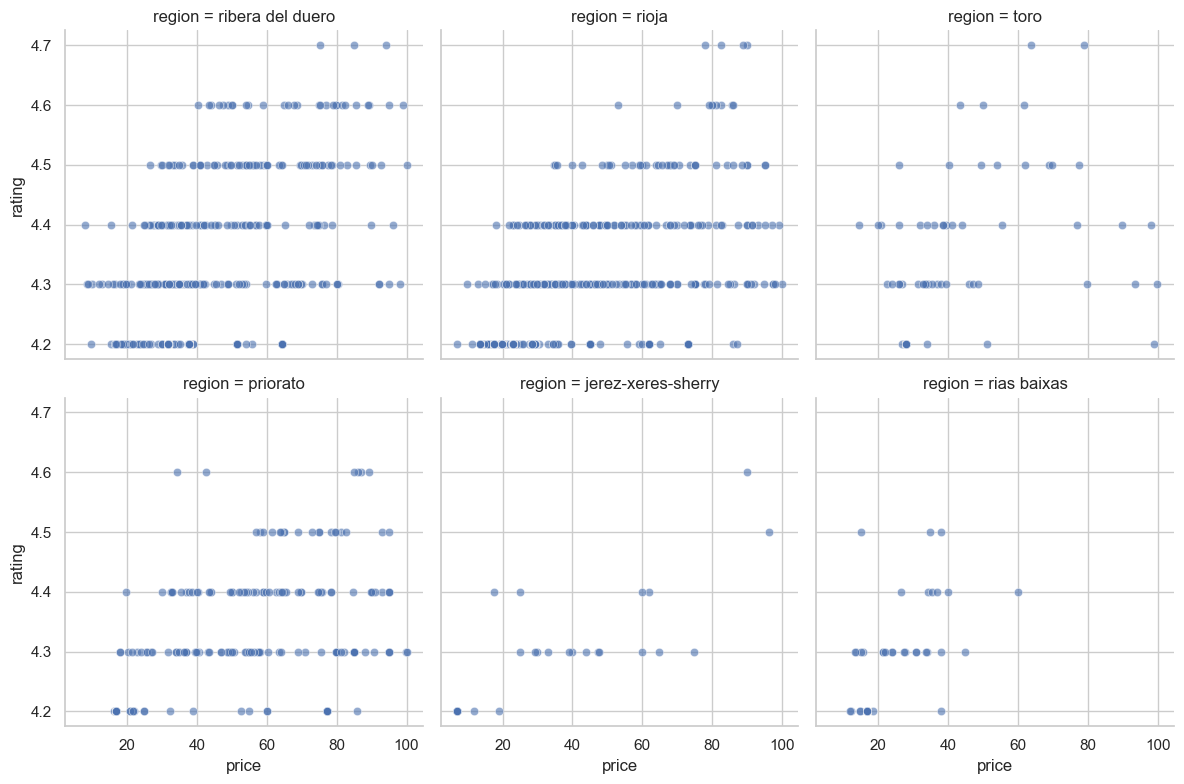

In [120]:
# 4. Relación calidad-precio
    #Examina cómo 'price' afecta las calificaciones ('rating'). Un gráfico de dispersión será útil aquí:

top_regions = vinos_hasta_100['region'].value_counts().head(6).index
g = sns.FacetGrid(vinos_hasta_100[vinos_hasta_100['region'].isin(top_regions)],
                 col='region', col_wrap=3, height=4)
g.map(sns.scatterplot, 'price', 'rating', alpha=0.6)



Los vinos hasta 100€ tienen buena calidad por un precio accesible, mientras que los vinos desde 100€ tienden a calificaciones más altas y precios mayores, lo que refleja una percepción de calidad superior. Regiones como Aragón ofrecen tanto opciones asequibles como premium, mostrando diversidad en su producción.

Hipótesis 4: Bodegas reconocidas

Las mas famosas

In [40]:


bodegas = vinos_espana.groupby("winery").agg({"num_reviews": "sum", "rating": "mean"})
# Ordenar por 'num_reviews' y 'rating' en orden descendente
bodegas = bodegas.sort_values(by=["num_reviews", "rating"], ascending=[False, False])
# umbral del percentil 75 para num_reviews
threshold = bodegas["num_reviews"].quantile(0.75)
bodegas.head(5)

,num_reviews,rating
winery,,
Contino,178239,4.204595
La Rioja Alta,173424,4.221654
Matarromera,107400,4.210345
Vega Sicilia,105242,4.670833
Imperial,104329,4.203070


C:\Users\JUAN\AppData\Local\Temp\ipykernel_4668\2734856144.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




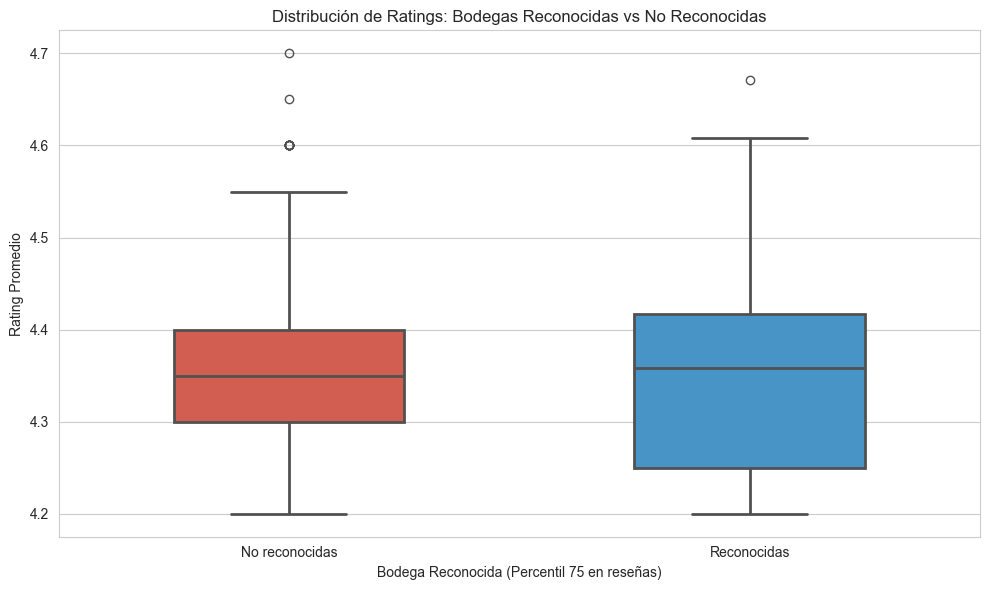

In [41]:


bodegas["recognized_winery"] = bodegas["num_reviews"] > threshold

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
palette = {"True": "#3498db", "False": "#e74c3c"} 

sns.boxplot(
    data=bodegas,
    x='recognized_winery',
    y='rating',
    palette=palette,
    width=0.5,
    linewidth=2,
)

plt.title('Distribución de Ratings: Bodegas Reconocidas vs No Reconocidas')
plt.xlabel('Bodega Reconocida (Percentil 75 en reseñas)')
plt.ylabel('Rating Promedio')
plt.xticks([False, True], ['No reconocidas', 'Reconocidas'])

plt.tight_layout()
plt.show()

Las bodegas reconocidas muestran ratings ligeramente superiores (mediana ~4.6) y mayor consistencia que las no reconocidas (mediana ~4.4), aunque algunas joyas ocultas en este último grupo superan en calidad a muchas establecidas, revelando que el prestigio no siempre garantiza excelencia pero sí uniformidad.

Las menos famosas

In [42]:

bodegas = vinos_espana.groupby("winery").agg({"num_reviews": "sum", "rating": "mean"})
bodegas = bodegas.sort_values(by=["num_reviews", "rating"], ascending=[True, True])
threshold = bodegas["num_reviews"].quantile(0.25)
bodegas_menos_famosas = bodegas[bodegas["num_reviews"] < threshold]
bodegas_menos_famosas.head(5)

,num_reviews,rating
winery,,
Cuentavinas,25,4.3
Samsara,25,4.3
Bodegas Asenjo & Manso,25,4.4
Bodegas Frontonio,25,4.4
Particular,25,4.4


Las bodegas más reconocidas, como Contino y Vega Sicilia, suelen tener mejores calificaciones, sin importar el precio de sus vinos. Esto confirma que la fama de una bodega puede influir mucho en cómo se valoran sus vinos.

In [43]:
promedios_bodega = vinos_espana.groupby('winery')[['rating', 'num_reviews']].mean().sort_values('rating', ascending=False)
promedios_bodega.head(10)  # Las 10 bodegas con mejores calificaciones

,rating,num_reviews
winery,,
Barbadillo,4.700000,58.000000
Vega Sicilia,4.670833,1096.270833
Finca Moncloa,4.650000,64.500000
Bodegas El Nido,4.607692,1123.923077
Alvear,4.600000,106.500000
Proyecto Garnachas de Espana,4.600000,45.000000
Quinta de la Quietud,4.600000,177.500000
Bodegas Yuste,4.600000,46.000000
Micro Bio (MicroBio),4.600000,33.000000


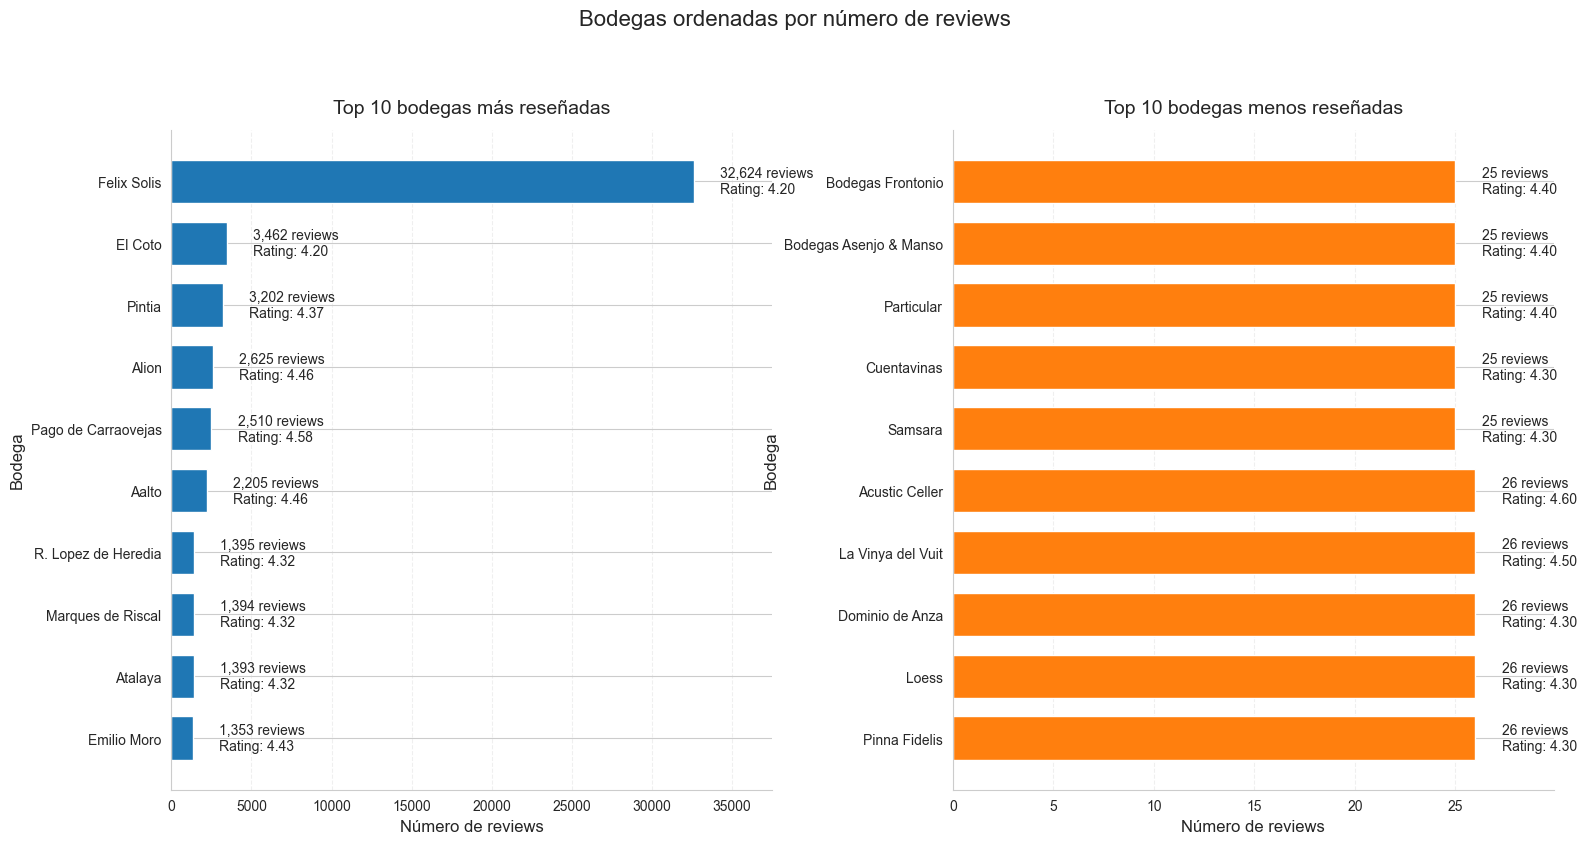

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir las bodegas más y menos reseñadas a partir de promedios_bodega
top_bodegas = promedios_bodega.sort_values('num_reviews', ascending=False).head(10)
low_bodegas = promedios_bodega[promedios_bodega['num_reviews'] > 0].nsmallest(10, 'num_reviews')

# 2. Configurar el gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Bodegas ordenadas por número de reviews', fontsize=16, y=1.05)
sns.set_style("whitegrid")

# 3. Gráfico de bodegas más reseñadas
ax1.barh(top_bodegas.index, top_bodegas['num_reviews'], color='#1f77b4', height=0.7)
ax1.set_title('Top 10 bodegas más reseñadas', pad=12, fontsize=14)
ax1.set_xlabel('Número de reviews', fontsize=12)
ax1.set_ylabel('Bodega', fontsize=12)
ax1.invert_yaxis()

for i, (reviews, rating) in enumerate(zip(top_bodegas['num_reviews'], top_bodegas['rating'])):
    ax1.text(reviews + 0.05*top_bodegas['num_reviews'].max(), i, 
            f'{reviews:,.0f} reviews\nRating: {rating:.2f}',
            va='center', fontsize=10)
ax1.set_xlim(0, top_bodegas['num_reviews'].max() * 1.15)

# 4. Gráfico de bodegas menos reseñadas
ax2.barh(low_bodegas.index, low_bodegas['num_reviews'], color='#ff7f0e', height=0.7)
ax2.set_title('Top 10 bodegas menos reseñadas', pad=12, fontsize=14)
ax2.set_xlabel('Número de reviews', fontsize=12)
ax2.set_ylabel('Bodega', fontsize=12)
ax2.invert_yaxis()

for i, (reviews, rating) in enumerate(zip(low_bodegas['num_reviews'], low_bodegas['rating'])):
    ax2.text(reviews + 0.05*low_bodegas['num_reviews'].max(), i, 
            f'{reviews:,.0f} reviews\nRating: {rating:.2f}',
            va='center', fontsize=10)
ax2.set_xlim(0, low_bodegas['num_reviews'].max() * 1.15)

# 5. Ajustes finales
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
for ax in (ax1, ax2):
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

Las bodegas más reconocidas, como Vega Sicilia, suelen tener mejores calificaciones y más reseñas, mostrando su influencia en la percepción de calidad. Sin embargo, algunas bodegas más pequeñas también logran calificaciones altas, destacando por su calidad, independientemente del número de reseñas

Las bodegas más reseñadas son populares, y las mejor calificadas destacan por su calidad.

Las bodegas con vinos premium destacan por sus altas calificaciones promedio y cantidad de reseñas, mostrando su calidad y popularidad.


Para vinos de hasta 100 euros, las bodegas con más reseñas combinan popularidad y calificaciones sólidas. En vinos premium, destacan bodegas con altas calificaciones promedio, reflejando mayor percepción de calidad

In [ ]:
# Calculo los percentiles
q75_reviews = vinos_hasta_100["num_reviews"].quantile(0.75)
q25_reviews = vinos_hasta_100["num_reviews"].quantile(0.25)
q75_rating = vinos_hasta_100["rating"].quantile(0.75)
q25_rating = vinos_hasta_100["rating"].quantile(0.25)

# Agrupo bodegas más y menos famosas (corrigiendo mas_famosas)
mas_famosas = vinos_hasta_100[(vinos_hasta_100["num_reviews"] >= q75_reviews) & (vinos_hasta_100["rating"] >= q75_rating)]

menos_famosas = vinos_hasta_100[(vinos_hasta_100["num_reviews"] <= q25_reviews) & (vinos_hasta_100["rating"] <= q25_rating)]

# promedio de valoración para comparación
promedio_mas_famosas = mas_famosas["rating"].mean()
promedio_menos_famosas = menos_famosas["rating"].mean()

print("Promedio de rating - Más famosas:", promedio_mas_famosas)
print("Promedio de rating - Menos famosas:", promedio_menos_famosas)

# Interpretación
if promedio_mas_famosas > promedio_menos_famosas:
    print("Las bodegas más famosas tienden a tener mejores ratings.")
else:
    print("Las bodegas más famosas no siempre tienen mejores ratings.")

Promedio de rating - Más famosas: 4.226793478260871
Promedio de rating - Menos famosas: 4.200000000000001
Las bodegas más famosas tienden a tener mejores ratings.


Estos datos nos permiten identificar tendencias en la valoración de las bodegas. Sabemos que las bodegas más famosas tienden a tener mejores ratings.

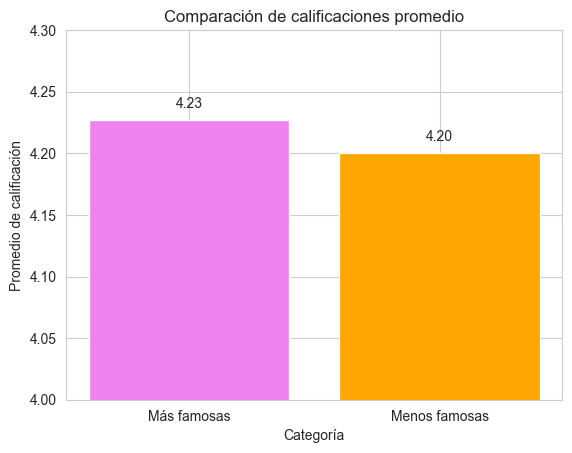

In [ ]:
categorias = ['Más famosas', 'Menos famosas']
ratings = [4.226793478260871, 4.200000000000001]

plt.bar(categorias, ratings, color=['violet', 'orange'])
plt.xlabel('Categoría')
plt.ylabel('Promedio de calificación')
plt.title('Comparación de calificaciones promedio')

for i, valor in enumerate(ratings):
    plt.text(i, valor + 0.01, f'{valor:.2f}', ha='center')

plt.ylim(4.0, 4.3)
plt.show()



La realidad que podemos observar en estos datos es que las bodegas más famosas tienen ligeramente mejores calificaciones promedio que las menos famosas. Sin embargo, esta diferencia es marginal y probablemente no sea significativa en términos prácticos. Esto sugiere que, aunque la popularidad pueda estar relacionada con la percepción de calidad, no siempre garantiza una superioridad notable en las valoraciones. Es un equilibrio entre preferencias y calidad percibida.

Hipótesis 5: Acidez y cuerpo

Gráfico de dispersión:


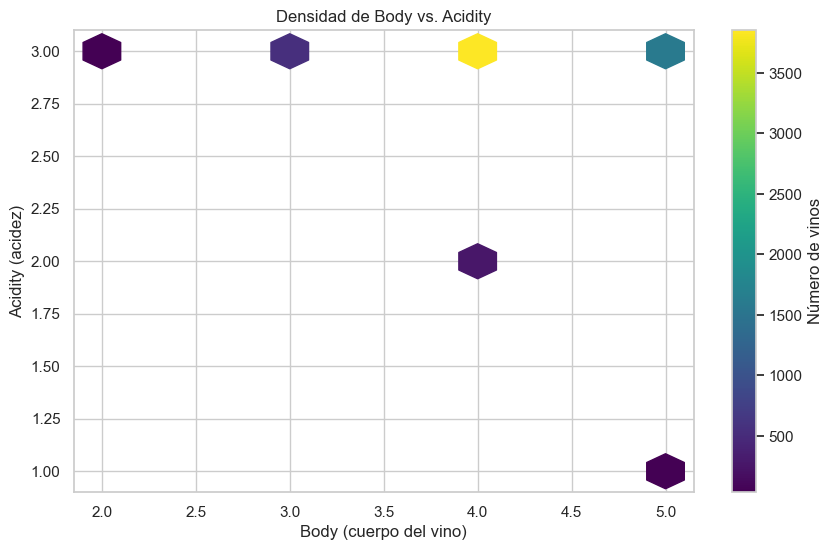

In [131]:
# Relación entre 'body', 'acidity' y 'rating'.

plt.figure(figsize=(10, 6))
hexplot = plt.hexbin(
    x=vinos_espana['body'],
    y=vinos_espana['acidity'],
    gridsize=15,
    cmap='viridis',
    mincnt=1
)

plt.colorbar(hexplot, label='Número de vinos')
plt.title('Densidad de Body vs. Acidity')
plt.xlabel('Body (cuerpo del vino)')
plt.ylabel('Acidity (acidez)')

plt.show()

"Los vinos españoles muestran una clara correlación inversa: mayor cuerpo (3-4) suele acompañarse de menor acidez (1.25-1.75), siendo este su perfil típico. Destacan tintos potentes (>4.5 cuerpo/<1.25 acidez) y escasean los vinos ligeros con alta acidez."

1. Histogramas para "rating" y "price" para analizar la distribución

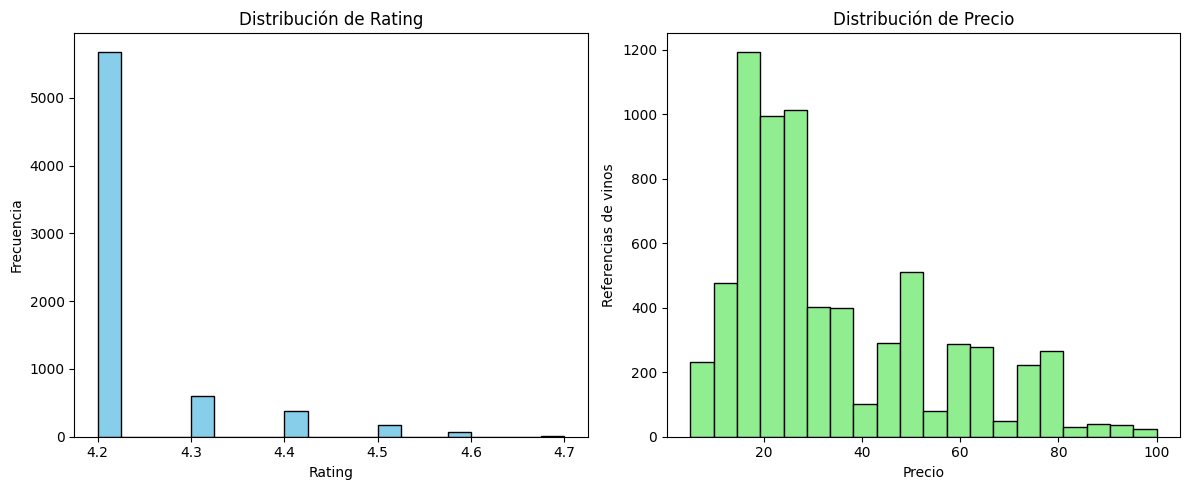

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Crea una figura con dos subplots en una fila.

# Histograma para rating
axs[0].hist(vinos_hasta_100['rating'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Rating')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frecuencia')

# Histograma para price
axs[1].hist(vinos_hasta_100['price'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribución de Precio')
axs[1].set_xlabel('Precio')
axs[1].set_ylabel('Referencias de vinos')

plt.tight_layout()
plt.show()

